In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dill

In [2]:
F = dill.load(open("biharminic_hermite", "rb"))

In [7]:
x0 = 0
xN = 1

y0 = 0
yN = 1

Nx = 3
Ny = 3

X, h_1 = np.linspace(x0, xN, Nx, retstep=True)
Y, h_2 = np.linspace(y0, yN, Ny, retstep=True)

x =    np.linspace(x0, xN, 1000)
y =    np.linspace(y0, yN, 1000)
IX, IY = np.meshgrid(X, Y, indexing="xy")

n_points_x = X.shape[0]
n_points_y = Y.shape[0]

In [8]:
matrix = np.zeros((4 * n_points_y * n_points_x, 4 * n_points_y * n_points_x))
b = np.zeros(4 * n_points_y * n_points_x)
f = np.ones_like(IX)

for global_i in range(4 * n_points_y * n_points_x):
    
    idx = np.unravel_index(global_i, (4 * n_points_y, n_points_x))
    tmp = np.zeros((4 * n_points_y, n_points_x))
    
    if idx[0] == 0:
        tmp[idx[0], idx[1]] = 1        
        matrix[global_i] = tmp.flatten()
        continue
    if idx[0] == 2:
        tmp[idx[0], idx[1]] = 1        
        matrix[global_i] = tmp.flatten()
        continue
        
    if idx[0] == 4 * n_points_y - 4:
        tmp[idx[0], idx[1]] = 1        
        b[global_i] = 0
        matrix[global_i] = tmp.flatten()
        continue
    if idx[0] == 4 * n_points_y - 2:
        tmp[idx[0], idx[1]] = 1        
        matrix[global_i] = tmp.flatten()
        continue
        

    if idx[1] == 0:
        tmp[(idx[0]//4)*4+0, idx[1]] = 1
        tmp[(idx[0]//4)*4+1, idx[1]] = 1
        matrix[global_i] = tmp.flatten()
        continue
        
    if idx[1] == n_points_x - 1:
        tmp[(idx[0]//4)*4+0, idx[1]] = 1
        tmp[(idx[0]//4)*4+1, idx[1]] = 1
        matrix[global_i] = tmp.flatten()
        continue
                
    
    if idx[0] % 4 == 0: #f
        
        for i in range(-1, 2):
            for j in range(-1, 2):
                tmp[(idx[0]//4)*4+0+4*i, idx[1]+j] = F[f"0_0_{0}_{0}_{i}_{j}"](h_1, h_2)
                tmp[(idx[0]//4)*4+1+4*i, idx[1]+j] = F[f"0_0_{0}_{1}_{i}_{j}"](h_1, h_2)
                tmp[(idx[0]//4)*4+2+4*i, idx[1]+j] = F[f"0_0_{1}_{0}_{i}_{j}"](h_1, h_2)
                tmp[(idx[0]//4)*4+3+4*i, idx[1]+j] = F[f"0_0_{1}_{1}_{i}_{j}"](h_1, h_2)
                
                
    if idx[0] % 4 == 1: #f
            
        for i in range(-1, 2):
            for j in range(-1, 2):
                try:
                    tmp[(idx[0]//4)*4+0+4*i, idx[1]+j] = F[f"0_1_{0}_{0}_{i}_{j}"](h_1, h_2)
                    tmp[(idx[0]//4)*4+1+4*i, idx[1]+j] = F[f"0_1_{0}_{1}_{i}_{j}"](h_1, h_2)
                    tmp[(idx[0]//4)*4+2+4*i, idx[1]+j] = F[f"0_1_{1}_{0}_{i}_{j}"](h_1, h_2)
                    tmp[(idx[0]//4)*4+3+4*i, idx[1]+j] = F[f"0_1_{1}_{1}_{i}_{j}"](h_1, h_2)
                except Exception as e:
                    print("1", e)

                
    if idx[0] % 4 == 2: #f
        
        for i in range(-1, 2):
            for j in range(-1, 2):

                tmp[(idx[0]//4)*4+0+4*i, idx[1]+j] = F[f"1_0_{0}_{0}_{i}_{j}"](h_1, h_2)
                tmp[(idx[0]//4)*4+1+4*i, idx[1]+j] = F[f"1_0_{0}_{1}_{i}_{j}"](h_1, h_2)
                tmp[(idx[0]//4)*4+2+4*i, idx[1]+j] = F[f"1_0_{1}_{0}_{i}_{j}"](h_1, h_2)
                tmp[(idx[0]//4)*4+3+4*i, idx[1]+j] = F[f"1_0_{1}_{1}_{i}_{j}"](h_1, h_2)
                
                
    if idx[0] % 4 == 3: #f
            
        for i in range(-1, 2):
            for j in range(-1, 2):
                try:
                    tmp[(idx[0]//4)*4+0+4*i, idx[1]+j] = F[f"1_1_{0}_{0}_{i}_{j}"](h_1, h_2)
                    tmp[(idx[0]//4)*4+1+4*i, idx[1]+j] = F[f"1_1_{0}_{1}_{i}_{j}"](h_1, h_2)
                    tmp[(idx[0]//4)*4+2+4*i, idx[1]+j] = F[f"1_1_{1}_{0}_{i}_{j}"](h_1, h_2)
                    tmp[(idx[0]//4)*4+3+4*i, idx[1]+j] = F[f"1_1_{1}_{1}_{i}_{j}"](h_1, h_2)
                except Exception as e:
                    print(e)

    matrix[global_i] = tmp.flatten()

1 index 12 is out of bounds for axis 0 with size 12
1 index 12 is out of bounds for axis 0 with size 12
1 index 12 is out of bounds for axis 0 with size 12
index 12 is out of bounds for axis 0 with size 12
index 12 is out of bounds for axis 0 with size 12
index 12 is out of bounds for axis 0 with size 12


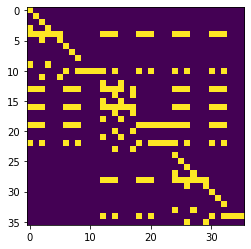

In [9]:
fig, ax = plt.subplots()
ax.imshow(matrix != 0)

In [10]:
c = np.linalg.solve(matrix, b)

LinAlgError: Singular matrix

ValueError: shape mismatch: objects cannot be broadcast to a single shape

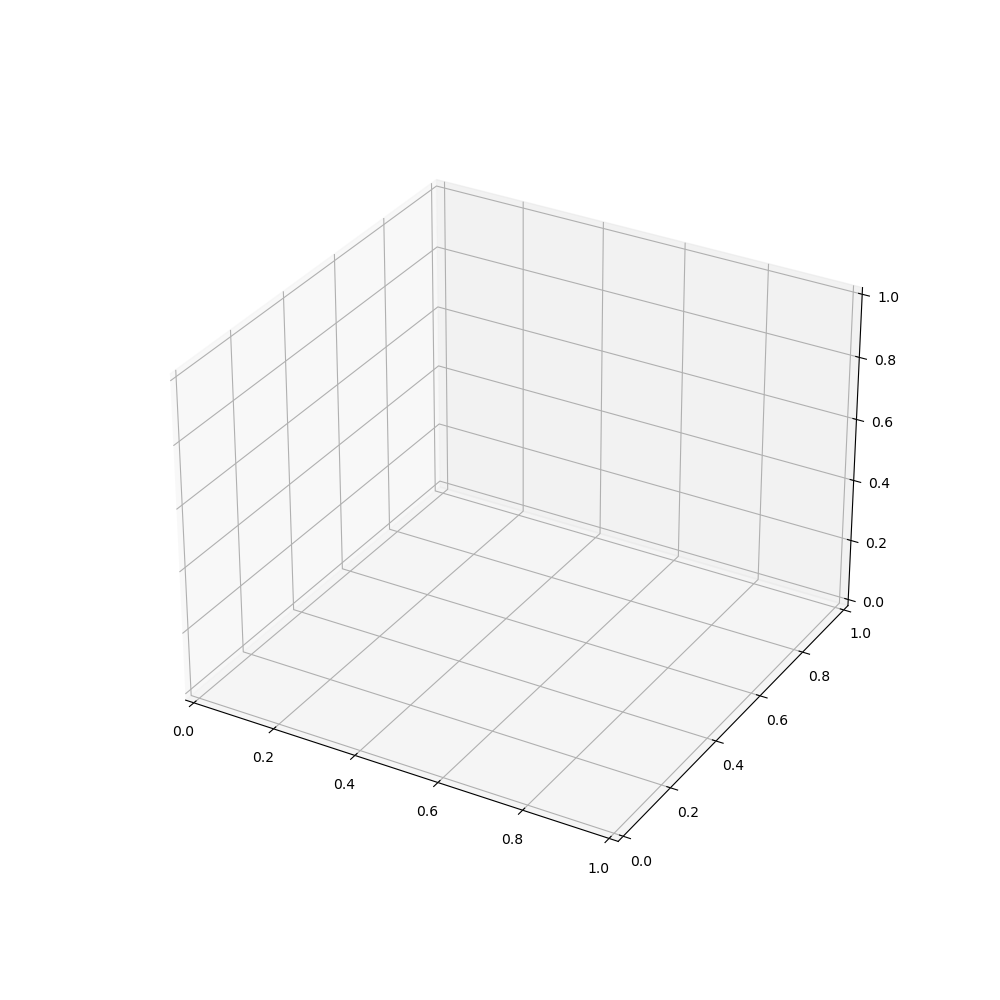

In [503]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(IX, IY, coefs[::4, :], cmap="magma")
plt.show()